# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])

# Create training set and define training dataloader
## YOUR CODE HERE ##
trainval_set = torchvision.datasets.MNIST(root = 'data', train = True, download = True, transform = transform)

train_len = int(len(trainval_set)*0.8)
val_len = len(trainval_set) - train_len

generator1 = torch.Generator().manual_seed(42)
train_set , val_set = torch.utils.data.random_split(trainval_set, [train_len, val_len], 
                                                    generator = generator1)



train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle = True)

val_loader = torch.utils.data.DataLoader(val_set, batch_size=16, shuffle =False)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test_set = torchvision.datasets.MNIST(root ='data', train =False, download = True, transform = transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 16)

print('The training set is {:n}, the validation set is {:n} and the test set is {:n}.'.format(len(train_set),
                                                                                                len(val_set),
                                                                                                len(test_set)))

The training set is 48000, the validation set is 12000 and the test set is 10000.


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I chose the ToTensor() and Normalize transform. The ToTensor() tranforms the image into tensor and the values are normalised to 0-1. The Normalize tensor is used to normalize the values. Then I split two sets from the trainval set to make the train_set which is 80% and val_set 20% of the trainval_set.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


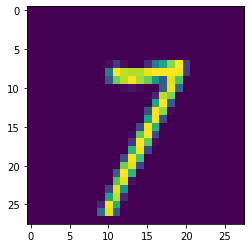

4


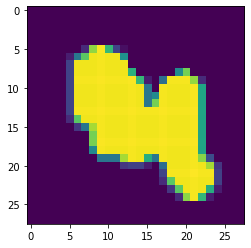

9


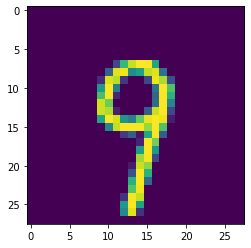

2


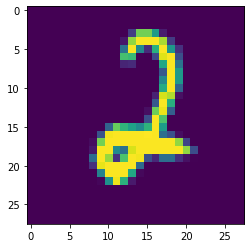

7


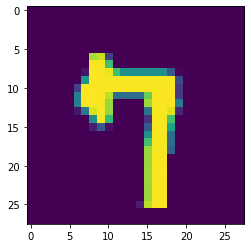

In [6]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512, 10)

    
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        
        return x

net = Net()
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
## YOUR CODE HERE ##
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
from tqdm import tqdm

In [11]:
## YOUR CODE HERE ##
n_epochs = 50

net.train()

train_loss_history, val_loss_history = [], []

for epoch in range(n_epochs):
    
    train_loss = 0.0
    
    for batch_id, (data, label) in tqdm(enumerate(train_loader), 
                                    desc = 'Training', 
                                    total = len(train_loader), 
                                    leave = True,
                                   ):
        
        # Pass to GPU if available.
        if torch.cuda.is_available():
            data, label = data.cuda(), label.cuda()
        
        optimizer.zero_grad()
    
        output = net(data)
    
        loss = criterion(output, label)
    
        loss.backward()
    
        optimizer.step()
    
    
        train_loss+=loss.item()*data.size(0)
        
    
    train_loss = train_loss/len(train_loader.dataset)
    train_loss_history.append(train_loss)
    
    
    with torch.no_grad():
        
        net.eval()
        
        valid_loss = 0.0
        
        for batch_id, (data, label) in tqdm(enumerate(val_loader), desc ='Validation', total = len(val_loader), leave = True):
            
            # Pass to GPU if available.
            if torch.cuda.is_available():
                data, label = data.cuda(), label.cuda()
            
            output = net(data)
            
            loss_value = criterion(output, label)
            
            valid_loss = valid_loss + (1/(batch_id +1)*(loss_value.data.item()-valid_loss))
            
    val_loss_history.append(valid_loss)
            
    net.train()
    
    print(f"Epoch {epoch + 1}: Training Loss {train_loss: .5f} and validation Loss {valid_loss: .5f}")
    

Training:   0%|          | 11/3000 [00:00<00:32, 92.86it/s]

Epoch 1: Training Loss  0.30410 and validation Loss  0.20038


Training:   0%|          | 10/3000 [00:00<00:30, 99.09it/s]

Epoch 2: Training Loss  0.15627 and validation Loss  0.13286


Training:   0%|          | 10/3000 [00:00<00:31, 95.46it/s]

Epoch 3: Training Loss  0.12292 and validation Loss  0.14437


Training:   0%|          | 9/3000 [00:00<00:34, 85.67it/s]

Epoch 4: Training Loss  0.09882 and validation Loss  0.19412


Training:   0%|          | 9/3000 [00:00<00:35, 85.19it/s]

Epoch 5: Training Loss  0.08868 and validation Loss  0.11686


Training:   0%|          | 8/3000 [00:00<00:39, 76.61it/s]

Epoch 6: Training Loss  0.07768 and validation Loss  0.13099


Training:   0%|          | 9/3000 [00:00<00:34, 87.08it/s]

Epoch 7: Training Loss  0.07164 and validation Loss  0.11821


Training:   0%|          | 11/3000 [00:00<00:28, 105.97it/s]

Epoch 8: Training Loss  0.06272 and validation Loss  0.14686


Training:   0%|          | 13/3000 [00:00<00:23, 124.76it/s]

Epoch 9: Training Loss  0.06139 and validation Loss  0.15968


Training:   0%|          | 10/3000 [00:00<00:30, 98.30it/s]

Epoch 10: Training Loss  0.05658 and validation Loss  0.12718


Training:   0%|          | 9/3000 [00:00<00:34, 86.21it/s]

Epoch 11: Training Loss  0.05158 and validation Loss  0.17106


Training:   0%|          | 9/3000 [00:00<00:33, 88.85it/s]

Epoch 12: Training Loss  0.05047 and validation Loss  0.14015


Training:   0%|          | 13/3000 [00:00<00:24, 123.70it/s]

Epoch 13: Training Loss  0.04781 and validation Loss  0.13561


Training:   0%|          | 12/3000 [00:00<00:25, 119.51it/s]

Epoch 14: Training Loss  0.04675 and validation Loss  0.15696


Training:   0%|          | 9/3000 [00:00<00:41, 71.68it/s]

Epoch 15: Training Loss  0.04357 and validation Loss  0.13777


Training:   0%|          | 10/3000 [00:00<00:31, 94.74it/s]

Epoch 16: Training Loss  0.04350 and validation Loss  0.13523


Training:   0%|          | 12/3000 [00:00<00:28, 104.47it/s]

Epoch 17: Training Loss  0.04020 and validation Loss  0.16524


Training:   0%|          | 10/3000 [00:00<00:30, 99.50it/s]

Epoch 18: Training Loss  0.03972 and validation Loss  0.13899


Training:   0%|          | 6/3000 [00:00<00:50, 59.40it/s]

Epoch 19: Training Loss  0.03558 and validation Loss  0.22854


Training:   0%|          | 12/3000 [00:00<00:25, 115.36it/s]

Epoch 20: Training Loss  0.04017 and validation Loss  0.20049


Training:   0%|          | 9/3000 [00:00<00:34, 85.98it/s]

Epoch 21: Training Loss  0.03529 and validation Loss  0.17123


Training:   0%|          | 10/3000 [00:00<00:31, 95.56it/s]

Epoch 22: Training Loss  0.03566 and validation Loss  0.18316


Training:   0%|          | 7/3000 [00:00<00:44, 67.05it/s]

Epoch 23: Training Loss  0.03362 and validation Loss  0.17946


Training:   0%|          | 10/3000 [00:00<00:31, 96.15it/s]

Epoch 24: Training Loss  0.03038 and validation Loss  0.16744


Training:   0%|          | 14/3000 [00:00<00:25, 115.29it/s]

Epoch 25: Training Loss  0.03388 and validation Loss  0.21593


Training:   0%|          | 14/3000 [00:00<00:21, 138.32it/s]

Epoch 26: Training Loss  0.02802 and validation Loss  0.19994


Training:   0%|          | 4/3000 [00:00<01:16, 39.26it/s]

Epoch 27: Training Loss  0.03061 and validation Loss  0.21437


Training:   0%|          | 12/3000 [00:00<00:27, 107.45it/s]

Epoch 28: Training Loss  0.03164 and validation Loss  0.20790


Training:   0%|          | 8/3000 [00:00<00:44, 66.87it/s]

Epoch 29: Training Loss  0.02909 and validation Loss  0.19358


Training:   0%|          | 9/3000 [00:00<00:34, 86.30it/s]

Epoch 30: Training Loss  0.02813 and validation Loss  0.20930


Training:   0%|          | 7/3000 [00:00<00:45, 65.67it/s]

Epoch 31: Training Loss  0.03283 and validation Loss  0.18593


Training:   0%|          | 10/3000 [00:00<00:30, 99.55it/s]

Epoch 32: Training Loss  0.02577 and validation Loss  0.23670


Training:   0%|          | 11/3000 [00:00<00:27, 107.22it/s]

Epoch 33: Training Loss  0.03252 and validation Loss  0.21495


Training:   0%|          | 11/3000 [00:00<00:29, 103.00it/s]

Epoch 34: Training Loss  0.02609 and validation Loss  0.28023


Training:   0%|          | 10/3000 [00:00<00:30, 98.82it/s]

Epoch 35: Training Loss  0.02912 and validation Loss  0.24314


Training:   0%|          | 7/3000 [00:00<00:45, 66.18it/s]

Epoch 36: Training Loss  0.02624 and validation Loss  0.23100


Training:   0%|          | 12/3000 [00:00<00:26, 114.48it/s]

Epoch 37: Training Loss  0.02726 and validation Loss  0.24449


Training:   0%|          | 5/3000 [00:00<01:01, 48.86it/s]

Epoch 38: Training Loss  0.02596 and validation Loss  0.21982


Training:   0%|          | 8/3000 [00:00<00:37, 78.84it/s]

Epoch 39: Training Loss  0.02646 and validation Loss  0.20991


Training:   0%|          | 13/3000 [00:00<00:29, 102.24it/s]

Epoch 40: Training Loss  0.02521 and validation Loss  0.20920


Training:   0%|          | 10/3000 [00:00<00:30, 97.71it/s]

Epoch 41: Training Loss  0.02363 and validation Loss  0.27459


Training:   0%|          | 4/3000 [00:00<01:15, 39.51it/s]

Epoch 42: Training Loss  0.02907 and validation Loss  0.26295


Training:   0%|          | 7/3000 [00:00<00:44, 66.76it/s]

Epoch 43: Training Loss  0.02560 and validation Loss  0.28079


Training:   0%|          | 8/3000 [00:00<00:39, 75.89it/s]

Epoch 44: Training Loss  0.02021 and validation Loss  0.26606


Training:   0%|          | 4/3000 [00:00<01:17, 38.88it/s]

Epoch 45: Training Loss  0.02336 and validation Loss  0.23860


Training:   0%|          | 6/3000 [00:00<00:53, 55.97it/s]

Epoch 46: Training Loss  0.02353 and validation Loss  0.26820


Training:   0%|          | 9/3000 [00:00<00:34, 86.68it/s]

Epoch 47: Training Loss  0.02441 and validation Loss  0.27794


Training:   0%|          | 11/3000 [00:00<00:32, 91.63it/s]

Epoch 48: Training Loss  0.02273 and validation Loss  0.27758


Training:   0%|          | 10/3000 [00:00<00:29, 99.95it/s]

Epoch 49: Training Loss  0.02276 and validation Loss  0.26553


Validation: 100%|██████████| 750/750 [00:03<00:00, 198.78it/s]

Epoch 50: Training Loss  0.02660 and validation Loss  0.27243


Plot the training loss (and validation loss/accuracy, if recorded).

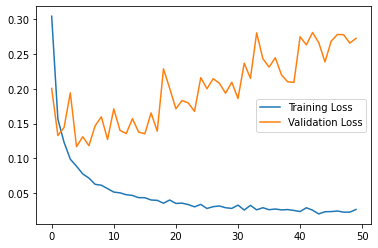

In [12]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label ='Validation Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [22]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

net.eval()  # prep model for *evaluation*

for batch_idx, (data, label) in tqdm(
    enumerate(test_loader),
    desc="Testing",
    total=len(test_loader),
    leave=True,
    ncols=80,
):
    
    # Pass to GPU if available.
    if torch.cuda.is_available():
        data, label = data.cuda(), label.cuda()
        
    # forward pass: compute predicted outputs by passing inputs to the model
    output = net(data)
    # calculate the loss
    loss = criterion(output, label)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(label.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(data.shape[0]):
        label1 = label.data[i]
        class_correct[label1] += correct[i].item()
        class_total[label1] += 1

# calculate and print avg test loss
test_loss = test_loss / len(test_loader.dataset)
print(f"Test Loss: {test_loss:.6f}\n")


print(
    f"\nTest Accuracy (Overall): {100.0 * np.sum(class_correct) / np.sum(class_total)}%% "
    f"({int(np.sum(class_correct))}/{int(np.sum(class_total))})"
)

Testing: 100%|███████████████████████████████| 625/625 [00:04<00:00, 147.94it/s]

Test Loss: 0.260012

Test Accuracy of 0: 98.47%% (965/980)
Test Accuracy of 1: 99.12%% (1125/1135)
Test Accuracy of 2: 98.35%% (1015/1032)
Test Accuracy of 3: 97.72%% (987/1010)
Test Accuracy of 4: 97.66%% (959/982)
Test Accuracy of 5: 98.32%% (877/892)
Test Accuracy of 6: 97.60%% (935/958)
Test Accuracy of 7: 96.11%% (988/1028)
Test Accuracy of 8: 95.28%% (928/974)
Test Accuracy of 9: 95.74%% (966/1009)

Test Accuracy (Overall): 97.45%% (9745/10000)


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [25]:
## YOUR CODE HERE ##
 #Initially I used 3 layer network but my accuracy was not crossing 80% then I used just one hidden and one output layer and
 #increased my learning rate from 0.1 to 0.001 and I achieved 97% accuracy.

## Saving your model
Using `torch.save`, save your model for future loading.

In [23]:
## YOUR CODE HERE ##
torch.save(net.state_dict(),'checkpoint.pth')